In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.preprocessing import StandardScaler  # It is important to scale the date


#Unsupervised Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

#Logistic Regression
from sklearn import linear_model

#Neural Network
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import tensorflow as tf
from keras import optimizers
from keras import losses
import keras

#SVM
from sklearn import svm

(11000, 901)
(11000,) (11000, 900)


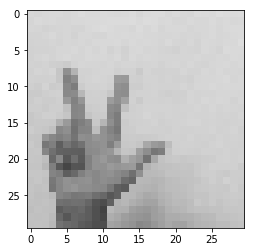

In [27]:
data = pd.read_csv('ASL_data_Numeric_labels_with_empty_backg_30x30_1000samp_number_only.csv')
data = data.dropna()
print(data.shape)
#Convert dataframe data into a numpy array
df = np.array(data.values)
#Select first column for the labels/y
y = df[:,0]
#Select remaining columns as x data(pixel array)
x = df[:,1:]
print(y.shape, x.shape)

sample1 = np.uint8(x[0,:].reshape(30,30))

img = Image.fromarray(sample1)
plt.imshow(img)

# Unsupervised Analysis

In [22]:
#Find accuracy, rsq and MSE
def statistics(yhat,y):
    #mean squared error
    mse = np.mean((y-yhat)**2)
    count = 0
    for i in range(len(yhat)):
        if(yhat[i] == y[i]):
            count += 1
    accuracy = count/len(yhat)
    #Calculate coefficient of determination
    rss = np.sum((y-yhat)**2)
    tss = np.sum((y-np.mean(y))**2)
    rsq = 1-(rss/tss)
    return mse,accuracy,rsq

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11000, 2)
Confusion matrix
 [[   0  455   68   51   18   25  106   30    0  126  121]
 [   0  440   51   42   53   44   31    0    0  280   59]
 [   0   66  297   64   58   25   60   45    0  316   69]
 [  33    0  278   42  162   10   25   47    0   54  349]
 [ 352    0   65  139   44   14   31   92   33  135   95]
 [   0    0  326   71  105   97    9  100    0  238   54]
 [   0    0  391   39   59    0    0  173    0  327   11]
 [  19    0   60  149  316    8    0   96    0  352    0]
 [   0    0  575    0  136    0    0   46    0  227   16]
 [  37    0  132  104  253  153    0  133    0  110   78]
 [   0    0    0    0    0    0    0    0 1000    0    0]]
MSE 17.289545454545454
Accuracy 0.10236363636363636
R^2 -0.7289545454545454


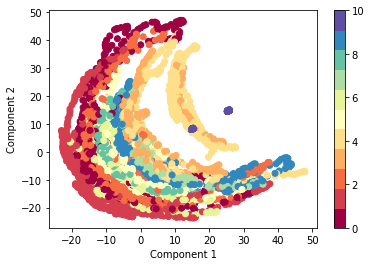

In [23]:
# Unsupervised Analysis-K Means Clustering
X_scale = StandardScaler()
x_unsup = X_scale.fit_transform(x)

#Visualize data in 2 dimensions: preserving maximum data variance
project = PCA(2).fit_transform(x_unsup)  # project from 900 to 2 dimensions
print(project.shape)

plt.scatter(project[:, 0], project[:, 1],
            c=y,cmap=plt.cm.get_cmap('Spectral', 11))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

#Without PCA transformation
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(x_unsup)
#predicted labels for each point
yhat = clusters.labels_
mse, accuracy,rsq = statistics(yhat,y) #found below, calculates MSE, R^2 and accuracy
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

900
82


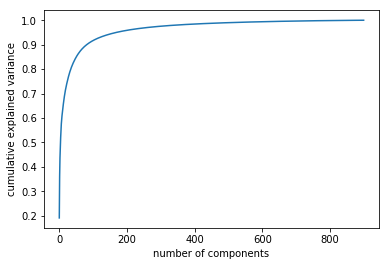

In [15]:
#Explained variance by number of components
pca = PCA().fit(x_unsup)
print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA(0.90).fit(x_unsup) 
print(pca.n_components_) #90% of variance explained by 82 components

Confusion matrix
 [[113 337   0  16  57  14  94  16 156   0 197]
 [ 63 267   0   0 102   0  24  22 278   0 244]
 [ 57 193   0  47  91  17  58  32 253   0 252]
 [ 87   0   3 231  62 519  27  45   0  26   0]
 [ 44   0   6 177 125 155 118  74   0 301   0]
 [ 26 269   0 288 174 105   0  44  16   0  78]
 [  9 254   0 104  83  95   0  11 149   0 295]
 [ 20   0   0 369 421 119   0  71   0   0   0]
 [ 34 302   0 133 123  27   0   0   6   0 375]
 [ 77   2   0 287 202 239   0 193   0   0   0]
 [  0   0 500   0   0   0   0   0   0 500   0]]
MSE 20.887727272727272
Accuracy 0.08345454545454545
R^2 -1.0887727272727274
[[ -8.4783595   20.18261661]
 [-11.9263819   -4.94267935]
 [ 25.51837576  14.50491906]
 [  0.75235005  -6.03242723]
 [ 11.10576204 -12.26988318]
 [ -4.35830292   8.27057984]
 [  3.38722738  36.42873486]
 [ 27.90626526 -10.17651956]
 [ -8.21301776 -15.75823711]
 [ 13.92446163  10.53927745]
 [-14.16754038   3.56018069]]
Clustered Labels [5 0 6 ... 5 3 2]
True Labels [ 3  3  4 ...  3  3 1

Text(0.5, 1.0, 'K-means clustering on the dataset')

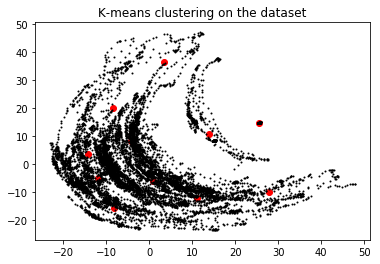

In [24]:
#K-Means clustering with PCA-transformed 2 components of images
#11 cluster for the digits 0-10 inclusive
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(project)

yhat = clusters.labels_
mse, accuracy, rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

# Plot the cluster centers and PCA transformed data
plt.plot(project[:,0], project[:,1],'k.', markersize=2)
centers = clusters.cluster_centers_
print(centers)
print("Clustered Labels",clusters.labels_)
print("True Labels", y)
plt.scatter(centers[:, 0], centers[:, 1], color='red')
plt.title('K-means clustering on the dataset')

In [25]:
#K-Means clustering with PCA-transformed 82 components of images
project_82 = PCA(n_components=82).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_82)

yhat = c.labels_
mse, accuracy,rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

Confusion matrix
 [[   0   64  111    0   21   22  131  468   24  115   44]
 [   0   48   39   17   31    0  290  432   80   51   12]
 [   0  275   64   57   20    8  385   45   42   66   38]
 [   4  278   32  216    8   76    2    0    6  340   38]
 [  31   66   51  242    7  439   25    0   26   68   45]
 [   0  294   12  108   88   69  260    0   70   56   43]
 [   0  394    0   87    0   51  342   56   31   10   29]
 [   0   60    0  355    3  104  170    0  249    0   59]
 [   0  511    0   12    0   41  289    0  130   17    0]
 [   0  151    0  352  145   95   74    0   54   76   53]
 [1000    0    0    0    0    0    0    0    0    0    0]]
MSE 26.921454545454544
Accuracy 0.08654545454545455
R^2 -1.6921454545454546


In [26]:
#K-Means clustering with PCA-transformed 200 components of images
project_200 = PCA(n_components=200).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_200)

yhat = c.labels_
mse, accuracy,rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

Confusion matrix
 [[ 453   32   95    0   68  128   25    0   20   49  130]
 [ 436    0   46    0   62   44   44    0   61   32  275]
 [  66   45   92    0  277   65   25    0   58   62  310]
 [   0   47  373    0  253   33   10   33  163   42   46]
 [   0   91   74   33   66   54   14  351   43  141  133]
 [   0   99   83    0  347   12   97    0  105   70  187]
 [   2  174   70    0  332    0    0    0   61   36  325]
 [   0   96    8    0   53    0    8   19  316  145  355]
 [   0   46   26    0  595    0    0    0  136    0  197]
 [   0  130   97    0  124    0  153   37  252  102  105]
 [   0    0    0 1000    0    0    0    0    0    0    0]]
MSE 19.557636363636362
Accuracy 0.08
R^2 -0.9557636363636364


# Logistic Regression - Lasso Regularization

In [5]:
# x_scale = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.3)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.517143
Accuracy on test data = 0.509697


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.875974
Accuracy on test data = 0.862727


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.963766
Accuracy on test data = 0.938182


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.970000
Accuracy on test data = 0.944242


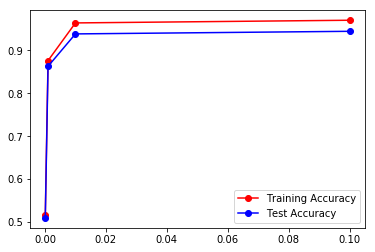

In [6]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')


# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistical Regression - Ridge Regression

In [7]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)
    

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 0.997013
Accuracy on test data = 0.969697


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.974848


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.975758


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training data = 1.000000
Accuracy on test data = 0.975758


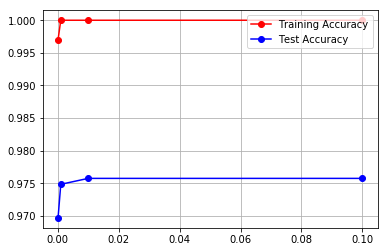

In [8]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistical Regression - Polynomial Feature Transformation

In [ ]:
poly = PolynomialFeatures(degree=2)

# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit(X_train)
X_transformed_test = poly.fit(X_test)

In [ ]:
# Not enough memory
X_transformed_train = poly.transform(X_train)
X_transformed_test = poly.transform(X_test)

# Support Vector Machine - Linear Kernal

In [12]:
acc_train_svm= []
acc_test_svm = []
c_svm = []


def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('TestAccuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)   

Train Accuracy = 0.985714
TestAccuracy = 0.976364
Train Accuracy = 0.999481
TestAccuracy = 0.997576
Train Accuracy = 1.000000
TestAccuracy = 0.998485
Train Accuracy = 1.000000
TestAccuracy = 0.998485


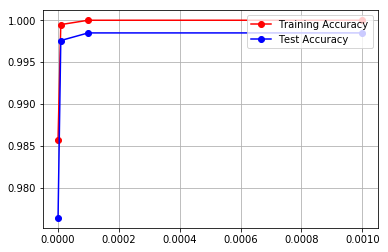

In [13]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.000001, 0.00001, 0.0001, 0.001]
for c in cVals:
    svm_linear(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Radial Basis Function Kernal

In [16]:
acc_train_svm = []
acc_test_svm = []
c_svm= []


# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_RBF(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 0.094026
Accuracy = 0.083636


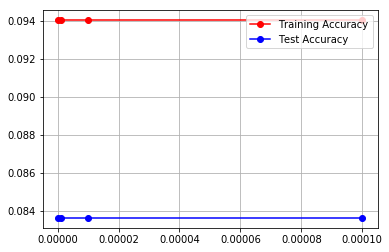

In [17]:
cVals = [0.0000001, 0.000001, 0.00001, 0.0001]

for c in cVals:
    svm_RBF(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Polynomial Kernal

In [18]:
acc_train_svm = []
acc_test_svm = []
c_svm= []


def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 1.000000
Accuracy = 0.850000


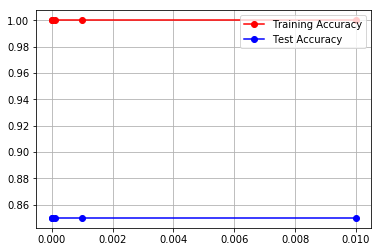

In [19]:
cVals = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

for c in cVals:
    svm_polynomial(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Convolutional Neural Network

### Preprocessing of data

In [28]:
#Reinitialize data
#Scaling the features to help the algorithm converge, we will scale the data to have a mean of 0 and unit variance
#Run with original X data once
X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

#Split the data into training and test set.  60% training and 40% test, shuffle data
X_train, X_test, y_train, y_test = train_test_split(x_cnn, y, test_size=0.4,shuffle=True)
x_train = X_train.reshape(X_train.shape[0],30,30,1)
x_test = X_test.reshape(X_test.shape[0],30,30,1)

#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

print(x_train.shape)
print(y_train.shape)

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6600, 30, 30, 1)
(6600, 11)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.5745 - acc: 0.8258 - val_loss: 0.0399 - val_acc: 0.9934
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0143 - acc: 0.9979 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 7.3908e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 4.7263e-04 - acc: 1.0000 - val_loss: 7.9095e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 3.4011e-04 - acc: 1.0000 - val_loss: 6.5140e-04 - val_acc: 1.0000
Epoch 7

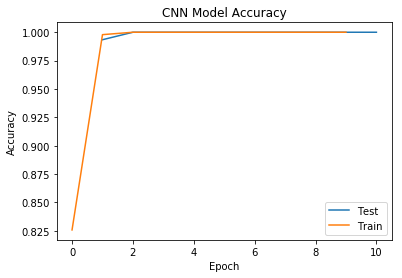

rsq = 0.999980


In [29]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Learning Rate (increased from 0.001 to 0.01)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 2.1136 - acc: 0.5350 - val_loss: 0.6194 - val_acc: 0.8055
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.4068 - acc: 0.8615 - val_loss: 0.2788 - val_acc: 0.9141
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2899 - acc: 0.9044 - val_loss: 0.2075 - val_acc: 0.9257
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1572 - acc: 0.9473 - val_loss: 0.1294 - val_acc: 0.9605
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1525 - acc: 0.9489 - val_loss: 0.1590 - val_acc: 0.9514
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1662 - acc: 0.9471 - val_loss: 0.1148 - val_acc: 0.9620
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1220 - acc: 0.9602 - val_loss: 0.1204 - val_acc: 0.9573
Epoch 8/10
660

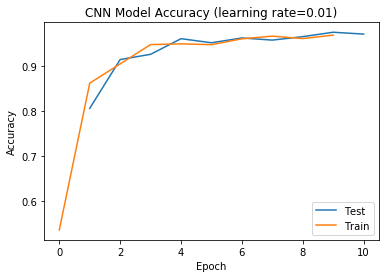

rsq = 0.953208


In [30]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.01
learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.01)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Learning Rate (decreased from 0.001 to 0.0001)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 1.6905 - acc: 0.5617 - val_loss: 1.0601 - val_acc: 0.7350
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.7179 - acc: 0.8256 - val_loss: 0.4499 - val_acc: 0.9070
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.3099 - acc: 0.9474 - val_loss: 0.2321 - val_acc: 0.9582
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1535 - acc: 0.9794 - val_loss: 0.1232 - val_acc: 0.9855
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0859 - acc: 0.9917 - val_loss: 0.0812 - val_acc: 0.9902
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0528 - acc: 0.9948 - val_loss: 0.0531 - val_acc: 0.9939
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0356 - acc: 0.9973 - val_loss: 0.0328 - val_acc: 0.9957
Epoch 8/10
66

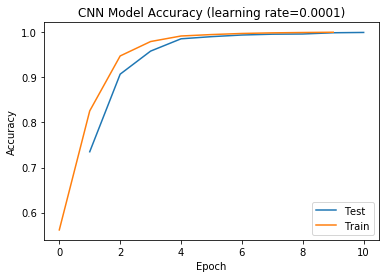

rsq = 0.997559


In [31]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.0001
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.0001)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Layers (Removed a Convolution and Pooling Layer)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 12s 2ms/step - loss: 0.5237 - acc: 0.8468 - val_loss: 0.0565 - val_acc: 0.9889
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0215 - acc: 0.9965 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 8s 1ms/step - loss: 9.5483e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 8s 1ms/step - loss: 6.9170e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 8s 1ms/step - loss: 5.1678e-04 - acc: 1.0000 - val_loss: 8.1281e-04 - val_acc: 1.00

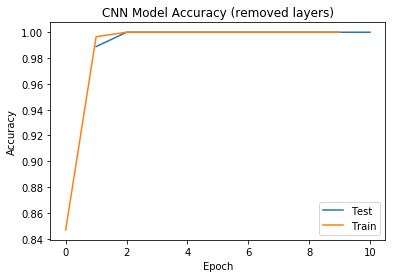

rsq = 0.999987


In [33]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, removed a convolution and pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (removed layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Activation Function (sigmoid)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 2.4559 - acc: 0.0985 - val_loss: 2.3352 - val_acc: 0.1450
Epoch 2/10
6600/6600 [==============================] - 8s 1ms/step - loss: 1.6264 - acc: 0.4630 - val_loss: 0.9856 - val_acc: 0.6834
Epoch 3/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.6711 - acc: 0.8018 - val_loss: 0.4973 - val_acc: 0.8432
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.3747 - acc: 0.9092 - val_loss: 0.3218 - val_acc: 0.9250
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2489 - acc: 0.9452 - val_loss: 0.2267 - val_acc: 0.9425
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1732 - acc: 0.9629 - val_loss: 0.1556 - val_acc: 0.9677
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1198 - acc: 0.9777 - val_loss: 0.1116 - val_acc: 0.9718
Epoch 8/10
66

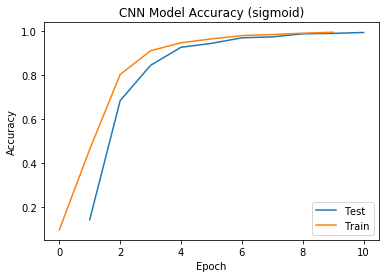

rsq = 0.979257


In [34]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used sigmoid activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='sigmoid',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Activation Function (tanh)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.5529 - acc: 0.8271 - val_loss: 0.0807 - val_acc: 0.98114 - ac
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0246 - acc: 0.9956 - val_loss: 0.0102 - val_acc: 0.9995
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 9.3155e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 7.0504e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

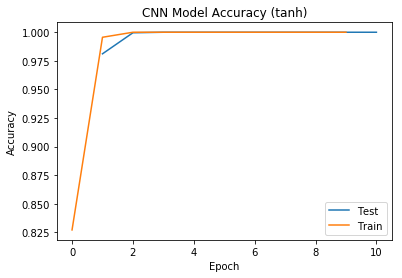

rsq = 0.999970


In [35]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used tanh activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='tanh'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Batch Normalization Regularization

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 27s 4ms/step - loss: 0.1955 - acc: 0.9465 - val_loss: 0.0079 - val_acc: 0.9989
Epoch 2/10
6600/6600 [==============================] - 20s 3ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 20s 3ms/step - loss: 5.6712e-04 - acc: 1.0000 - val_loss: 6.3974e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 19s 3ms/step - loss: 3.4659e-04 - acc: 1.0000 - val_loss: 5.1222e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 20s 3ms/step - loss: 2.7529e-04 - acc: 1.0000 - val_loss: 3.9035e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 19s 3ms/step - loss: 2.1317e-04 - acc: 1.0000 - val_loss: 3.2096e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 19s 3ms/step - loss: 1.6274e-04 - acc: 1.0000 - val_lo

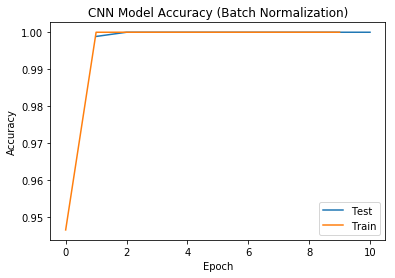

rsq = 0.999994


In [36]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add Batch normalization
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Batch Normalization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### LASSO (L1) Regression Regularization

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_regularizer=<keras.reg..., activation="softmax")`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 2.8980 - acc: 0.8079 - val_loss: 1.0997 - val_acc: 0.9866
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.6793 - acc: 0.9897 - val_loss: 0.4205 - val_acc: 0.9909
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.3058 - acc: 0.9977 - val_loss: 0.2245 - val_acc: 0.9989
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1843 - acc: 0.9994 - val_loss: 0.1479 - val_acc: 0.9993
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1279 - acc: 1.0000 - val_loss: 0.1119 - val_acc: 0.9995
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0973 - acc: 1.0000 - val_loss: 0.0885 - val_acc: 0.9993
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0816 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9989
Epoch 8/10
660

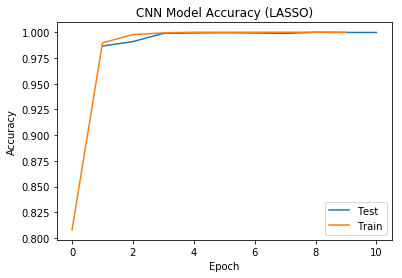

rsq = 0.999303


In [37]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L1 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l1(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (LASSO)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Ridge (L2) Regression Regularization

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_regularizer=<keras.reg..., activation="softmax")`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.7680 - acc: 0.8177 - val_loss: 0.2083 - val_acc: 0.9861
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1548 - acc: 0.9952 - val_loss: 0.1355 - val_acc: 0.9950
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1003 - acc: 0.9995 - val_loss: 0.0842 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0713 - acc: 1.0000 - val_loss: 0.0622 - val_acc: 0.9998
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0532 - acc: 1.0000 - val_loss: 0.0486 - val_acc: 0.9998
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0401 - acc: 1.0000 - val_loss: 0.0363 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0307 - acc: 1.0000 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 8/10
660

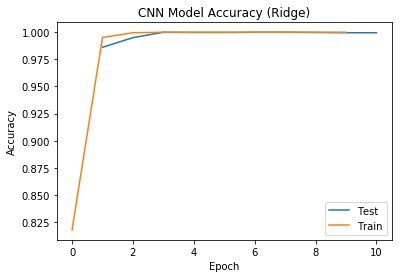

rsq = 0.999589


In [38]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L2 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l2(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Ridge)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))